## Importing liberaries

In [1]:
!pip install catboost
!pip install Xgboost
!pip install imblearn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

warnings.filterwarnings("ignore")
%matplotlib inline

In [70]:
# Loading DataSet
df_train = pd.read_csv('/kaggle/input/aps-failure-at-scania-trucks-data-set/aps_failure_training_set.csv', na_values="na")

In [4]:
df_train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [71]:
print(f" Training data shape : {df_train.shape}")

 Training data shape : (60000, 171)


In [6]:
df_train.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


From above i can observe, there are many columns which are right skewed(have too much outliers)

## Inspecting the Distribution of Target class

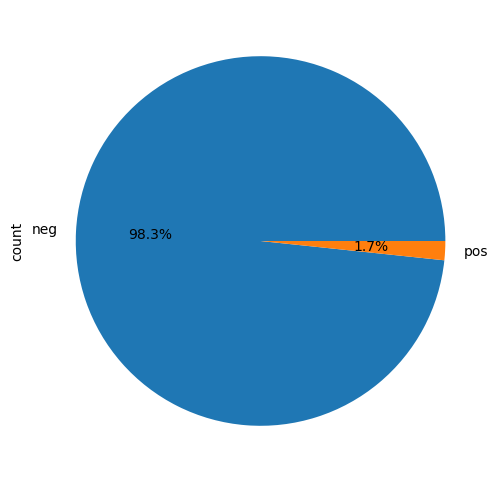

class
neg    59000
pos     1000
Name: count, dtype: int64


In [7]:
fig, ax = plt.subplots(figsize=(6,6))
df_train['class'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

value_counts = df_train['class'].value_counts()
print(value_counts)

Positive: 1000, Negative: 59000


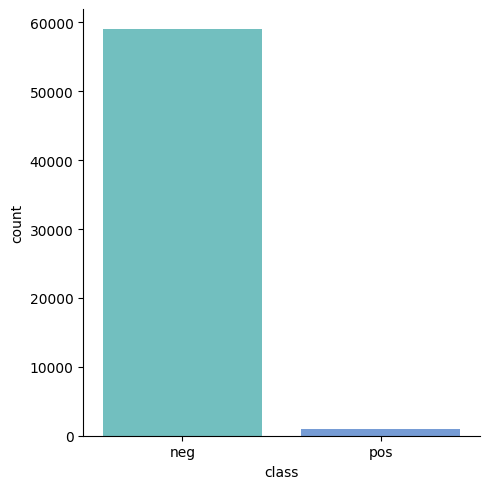

In [8]:
# Distribution of Target Variable

pos_cnt = df_train[df_train['class']=='pos'].shape[0]
neg_cnt = df_train[df_train['class']=='neg'].shape[0]
print("Positive: "+ str(pos_cnt) + ", Negative: "+ str(neg_cnt))
sns.catplot(data=df_train, x="class", kind = "count", palette="winter_r", alpha=.6)
plt.show()

## Inspecting Distribution of missing values

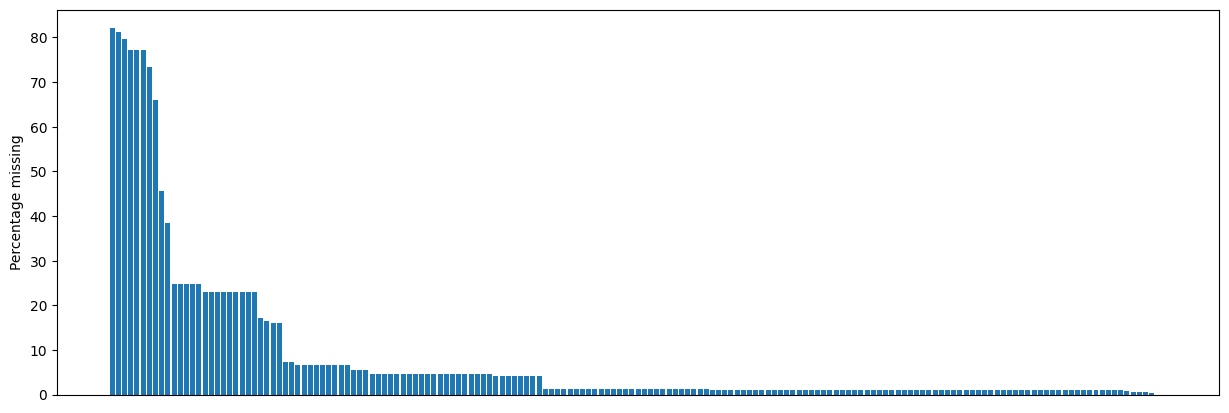

In [9]:
fig, ax = plt.subplots(figsize=(15,5))

missing = df_train.isnull().sum().div(df_train.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)
# print(missing.values.T[0])
ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

In [10]:
df_train.isnull().sum().values

array([    0,     0, 46329,  3335, 14861,  2500,  2500,   671,   671,
         671,   671,   671,   671,   671,   671,   671,   671,   645,
         629,   629,  4400,   642,   629,   642,   589,   642,   589,
        2723,   629,   629,   629,  2500,  2501,   671,   671,   671,
         671,   671,   671,   671,   671,   671,   671,   671,   671,
         671,   671,   671,   671,   671,   671,   671,   671,   688,
         688,   688,   688,   688,   688,   688,   688,   688,   688,
         645,  2725,  2727,  2503,  2500,   642,   642,   589,   589,
       23034, 27277, 39549, 44009, 46333, 47740, 48722, 49264,   726,
         167,   691,   691,  3257,   473,  2723,  4356,   726,  3255,
         676,  2502, 14861, 14861, 14861,   338,   338,   338,  9553,
        9877,   687,   687,   687,   687,   687,   687,   687,   687,
         687,   687, 14861,  2724,   691, 46329,   669,   669,   669,
         669,   669,   669,   669,   669,   669,   669, 13808, 13808,
       13808, 13808,

In [7]:
# Storing numerical and categorical columns in a list
numeric_features = [feature for feature in df_train.columns if df_train[feature].dtype != object]
categorical_features = [feature for feature in df_train.columns if df_train[feature].dtype == object]
print(f"Categotical_features are  {categorical_features}")
print(f"numeric_features are \n {numeric_features}")

Categotical_features are  ['class']
numeric_features are 
 ['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'c

In [8]:
# Columns having missing values > 70%
col_to_drop = []
for feature in numeric_features:
    null_cnt = df_train[feature].isnull().sum()
    missing_proportion = null_cnt/df_train.shape[0]
    if missing_proportion > 0.70:
        col_to_drop.append(feature)
        print(f"%age of missing values in {feature} is {(null_cnt/df_train.shape[0])*100}")

%age of missing values in ab_000 is 77.215
%age of missing values in bn_000 is 73.34833333333334
%age of missing values in bo_000 is 77.22166666666666
%age of missing values in bp_000 is 79.56666666666666
%age of missing values in bq_000 is 81.20333333333333
%age of missing values in br_000 is 82.10666666666665
%age of missing values in cr_000 is 77.215


In [72]:
# Droping columns having high proportion of missing values
df_train.drop(columns = col_to_drop, inplace=True)

In [73]:
print(df_train.shape)

(60000, 164)


In [11]:
# Total proportion of missing values
total_missing_values = df_train.isnull().sum().values.sum()
total_values = np.product(df_train.shape)

percentage_of_missing_values = (total_missing_values*100)/total_values
print(f'Percentage of missing values in Training data is {percentage_of_missing_values}')

Percentage of missing values in Training data is 5.29765243902439


In [12]:
def evaluate_clf(actual, predicted):
    '''
    This Function takes true and predicted values
    Return: Accuracy, f1-score, Precision, Recall, Roc-Auc Score
    '''
    accuracy = accuracy_score(actual, predicted)
    f1 = f1_score(actual, predicted)
    precision = precision_score(actual, predicted)
    recall = recall_score(actual, predicted)
    roc_auc = roc_auc_score(actual, predicted)
    return accuracy, f1, precision, recall, roc_auc

In [13]:
def total_cost(y_true, y_pred):
    '''
    return Total cost due to model's misclassification
    '''
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10*fp + 500*fn
    return cost

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

def evaluate_models(X, y, models):
    '''
    This function takes independent features (X), target variable (y), and a dictionary of models as input.
    It iterates through the models, evaluates metrics, and returns a DataFrame containing the performance report of all models.
    '''
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        
        # Predictions
        train_y_pred = model.predict(X_train)
        y_pred = model.predict(X_test)
        
        # Performance on Training data
        train_acc, train_f1, train_precision, train_recall, train_roc_auc = evaluate_clf(y_train, train_y_pred)
        train_cost = total_cost(y_train, train_y_pred)
        
        # Performance on Test data
        acc, f1, precision, recall, roc_auc = evaluate_clf(y_test, y_pred)
        cost = total_cost(y_test, y_pred)
        
        # Collecting results
        results.append({
            'Model_Name': name,
            'Train_Accuracy': train_acc,
            'Train_F1': train_f1,
            'Train_Precision': train_precision,
            'Train_Recall': train_recall,
            'Train_ROC_AUC': train_roc_auc,
            'Train_Cost': train_cost,
            'Test_Accuracy': acc,
            'Test_F1': f1,
            'Test_Precision': precision,
            'Test_Recall': recall,
            'Test_ROC_AUC': roc_auc,
            'Test_Cost': cost
        })
        
        # Printing results
        print(f"Model: {name}")
        print('Model Performance for training set')
        print(f'Accuracy: {train_acc:.4f}')
        print(f'F1 score: {train_f1:.4f}')
        print(f'Precision: {train_precision:.4f}')
        print(f'Recall: {train_recall:.4f}')
        print(f'ROC AUC Score: {train_roc_auc:.4f}')
        print(f'Cost: {train_cost:.4f}')
        print('========================================')
        print('Model Performance for validation set')
        print(f'Accuracy: {acc:.4f}')
        print(f'F1 score: {f1:.4f}')
        print(f'Precision: {precision:.4f}')
        print(f'Recall: {recall:.4f}')
        print(f'ROC AUC Score: {roc_auc:.4f}')
        print(f'Cost: {cost:.4f}')
        print('========================================\n')
    
    report = pd.DataFrame(results).sort_values(by=['Test_Cost'])
    return report


In [62]:
X_train = df_train.drop(columns=['class'])
y_train = df_train['class']

In [63]:
y_train = y_train.replace({'pos':1, 'neg':0})

## Treating Missing Values

### **Experiment 1: KNN Imputer**
    

In [22]:
numeric_features = [feature for feature in df_train.columns if df_train[feature].dtype != object]

knn_pipeline = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=3)),
    ('RobustScaler', RobustScaler())
])

In [24]:
X_train_transformed_knn = knn_pipeline.fit_transform(X_train)

In [25]:
X_train_transformed_knn = pd.DataFrame(X_train_transformed_knn, columns=numeric_features)

### Handling Imbalanced Data

**SMOTETomek** is one of such a hybrid technique that aims to clean overlapping data points for each of the class distributed in sample space.
1. **SMOTE:** This technique generates synthetic samples for the minority class by interpolating between existing samples.
2. **Tomek Links:** This technique removes examples from the majority class that are very close to examples from the minority class, thus cleaning up the class boundary.

In [26]:
from imblearn.combine import SMOTETomek

# resampling the minority class.
smt = SMOTETomek(random_state=42, sampling_strategy='minority', n_jobs=-1)
# Fit the model to generate the data.
X_train_transformed_knn, y_train_transformed = smt.fit_resample(X_train_transformed_knn, y_train)

In [27]:
print(y_train_transformed.value_counts())
X_train_transformed_knn.shape

class
0    58880
1    58880
Name: count, dtype: int64


(117760, 163)

### Initialize Models in a Dictionary

In [24]:
models = {
    "RandomForest" : RandomForestClassifier(),
    "GradientBoosting" : GradientBoostingClassifier(),
    "XGBClassifier" : XGBClassifier(),
    "CatBoostClassifier" : CatBoostClassifier(verbose=False),
    "AdaBoostClassifier" : AdaBoostClassifier()
}

In [40]:
report_knn = evaluate_models(X_train_transformed_knn, y_train_transformed, models)

Model: RandomForest
Model Performance for training set
Accuracy: 1.0000
F1 score: 1.0000
Precision: 1.0000
Recall: 1.0000
ROC AUC Score: 1.0000
Cost: 0.0000
Model Performance for validation set
Accuracy: 0.9941
F1 score: 0.9941
Precision: 0.9914
Recall: 0.9967
ROC AUC Score: 0.9941
Cost: 20010.0000

Model: GradientBoosting
Model Performance for training set
Accuracy: 0.9840
F1 score: 0.9841
Precision: 0.9810
Recall: 0.9873
ROC AUC Score: 0.9840
Cost: 309040.0000
Model Performance for validation set
Accuracy: 0.9830
F1 score: 0.9829
Precision: 0.9792
Recall: 0.9866
ROC AUC Score: 0.9830
Cost: 80450.0000

Model: XGBClassifier
Model Performance for training set
Accuracy: 1.0000
F1 score: 1.0000
Precision: 1.0000
Recall: 1.0000
ROC AUC Score: 1.0000
Cost: 0.0000
Model Performance for validation set
Accuracy: 0.9974
F1 score: 0.9973
Precision: 0.9953
Recall: 0.9994
ROC AUC Score: 0.9974
Cost: 4050.0000

Model: CatBoostClassifier
Model Performance for training set
Accuracy: 0.9992
F1 score: 

In [18]:
report_knn

**Insight: KNNImpyter with XgBoost gives optimal score.**

### **Experiment 2: Simple Imputer with Strategy Median**

In [19]:

numeric_features = [feature for feature in df_train.columns if df_train[feature].dtype != object]

median_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('RobustScaler', RobustScaler())
])

In [20]:
X_train_transformed_median = median_pipeline.fit_transform(X_train)

In [21]:
X_train_transformed_median = pd.DataFrame(X_train_transformed_median, columns=numeric_features)

In [22]:
from imblearn.combine import SMOTETomek

# resampling the minority class.
smt = SMOTETomek(random_state=42, sampling_strategy='minority', n_jobs=-1)
# Fit the model to generate the data.
X_train_transformed_median, y_train_transformed = smt.fit_resample(X_train_transformed_median, y_train)

In [25]:
report_median = evaluate_models(X_train_transformed_median, y_train_transformed, models)

Model: RandomForest
Model Performance for training set
Accuracy: 1.0000
F1 score: 1.0000
Precision: 1.0000
Recall: 1.0000
ROC AUC Score: 1.0000
Cost: 0.0000
Model Performance for validation set
Accuracy: 0.9956
F1 score: 0.9956
Precision: 0.9932
Recall: 0.9980
ROC AUC Score: 0.9957
Cost: 12300.0000

Model: GradientBoosting
Model Performance for training set
Accuracy: 0.9837
F1 score: 0.9838
Precision: 0.9803
Recall: 0.9873
ROC AUC Score: 0.9837
Cost: 309370.0000
Model Performance for validation set
Accuracy: 0.9829
F1 score: 0.9827
Precision: 0.9779
Recall: 0.9876
ROC AUC Score: 0.9829
Cost: 74590.0000

Model: XGBClassifier
Model Performance for training set
Accuracy: 1.0000
F1 score: 1.0000
Precision: 1.0000
Recall: 1.0000
ROC AUC Score: 1.0000
Cost: 500.0000
Model Performance for validation set
Accuracy: 0.9975
F1 score: 0.9975
Precision: 0.9957
Recall: 0.9992
ROC AUC Score: 0.9975
Cost: 5000.0000

Model: CatBoostClassifier
Model Performance for training set
Accuracy: 0.9995
F1 score

In [26]:
report_median

,Model_Name,Train_Accuracy,Train_F1,Train_Precision,Train_Recall,Train_ROC_AUC,Train_Cost,Test_Accuracy,Test_F1,Test_Precision,Test_Recall,Test_ROC_AUC,Test_Cost
2,XGBClassifier,0.999989,0.999989,1.000000,0.999979,0.999989,500,0.997494,0.997466,0.995713,0.999226,0.997515,5000
3,CatBoostClassifier,0.999511,0.999513,0.999450,0.999577,0.999511,10260,0.996899,0.996866,0.994774,0.998968,0.996925,6610
0,RandomForest,1.000000,1.000000,1.000000,1.000000,1.000000,0,0.995625,0.995580,0.993151,0.998021,0.995654,12300
1,GradientBoosting,0.983677,0.983786,0.980301,0.987296,0.983666,309370,0.982881,0.982749,0.977935,0.987611,0.982939,74590
4,AdaBoostClassifier,0.975191,0.975298,0.974165,0.976433,0.975188,568730,0.974045,0.973735,0.973024,0.974447,0.974050,151640


**Insight: Median Imputation with XGBoost gives optimal score.**

**Insight: MICE Imputation with XGBoost gives optimal score.**

### **Experiment 4: Simple Imputer with Strategy Constant**

In [57]:
numeric_features = [feature for feature in df_train.columns if df_train[feature].dtype != object]

constant_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('RobustScaler', RobustScaler())
])

In [61]:
X_train_transformed_const.shape

(60000, 163)

In [58]:
X_train_transformed_const = constant_pipeline.fit_transform(X_train)

In [64]:
# resampling the minority class.
smt = SMOTETomek(random_state=42, sampling_strategy='minority', n_jobs=-1)
# Fit the model to generate the data.
X_train_transformed_const, y_train_transformed = smt.fit_resample(X_train_transformed_const, y_train)

In [66]:
report_const = evaluate_models(X_train_transformed_const, y_train_transformed, models)

Model: RandomForest
Model Performance for training set
Accuracy: 1.0000
F1 score: 1.0000
Precision: 1.0000
Recall: 1.0000
ROC AUC Score: 1.0000
Cost: 0.0000
Model Performance for validation set
Accuracy: 0.9952
F1 score: 0.9952
Precision: 0.9920
Recall: 0.9984
ROC AUC Score: 0.9952
Cost: 10440.0000

Model: GradientBoosting
Model Performance for training set
Accuracy: 0.9832
F1 score: 0.9833
Precision: 0.9796
Recall: 0.9870
ROC AUC Score: 0.9832
Cost: 315720.0000
Model Performance for validation set
Accuracy: 0.9809
F1 score: 0.9808
Precision: 0.9775
Recall: 0.9841
ROC AUC Score: 0.9810
Cost: 95140.0000

Model: XGBClassifier
Model Performance for training set
Accuracy: 1.0000
F1 score: 1.0000
Precision: 1.0000
Recall: 1.0000
ROC AUC Score: 1.0000
Cost: 0.0000
Model Performance for validation set
Accuracy: 0.9973
F1 score: 0.9973
Precision: 0.9954
Recall: 0.9992
ROC AUC Score: 0.9973
Cost: 5040.0000

Model: CatBoostClassifier
Model Performance for training set
Accuracy: 0.9988
F1 score: 

In [67]:
report_const

,Model_Name,Train_Accuracy,Train_F1,Train_Precision,Train_Recall,Train_ROC_AUC,Train_Cost,Test_Accuracy,Test_F1,Test_Precision,Test_Recall,Test_ROC_AUC,Test_Cost
2,XGBClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,0,0.997324,0.997301,0.995383,0.999227,0.997343,5040
3,CatBoostClassifier,0.998811,0.998814,0.998244,0.999386,0.998809,15330,0.996007,0.995976,0.993424,0.998541,0.996033,9270
0,RandomForest,1.000000,1.000000,1.000000,1.000000,1.000000,0,0.995200,0.995166,0.991983,0.998369,0.995232,10440
1,GradientBoosting,0.983178,0.983285,0.979564,0.987035,0.983168,315720,0.980928,0.980795,0.977492,0.984120,0.980960,95140
4,AdaBoostClassifier,0.974937,0.975082,0.971962,0.978222,0.974929,527320,0.973622,0.973420,0.970802,0.976052,0.973646,142920


**Insight: Constant Imputation with XGBoost gives optimal score.**

### *From Above Experiments, The Best Model is XGBoost with KNN Imputation Technique having 99.7% accuracy and cost of 4050.*